In [33]:
import matplotlib.pyplot as plt
import numpy as np

import methods
import DanyaLab2.methods as methods2

In [34]:
from scipy.optimize import approx_fprime
import math

np.random.seed(12)


def generate_points(n, f, rg=1):
    X = rg * np.random.rand(n)
    y = []
    X_err = X + 0.2 * np.random.randn(n)
    for x in X_err:
        y.append(f(x))
    return X, np.asarray(y)


def mse(f, w, X, y):
    diff = 0
    for i in range(0, len(X)):
        diff += (f(w)(X[i]) - y[i]) ** 2
    return diff


def mse_func(f, X, y):
    return lambda w: mse(f, w, X, y)


def grad_calculator(x, func, dim):
    h = 1e-5
    res = []
    for i in range(dim):
        delta = np.zeros(dim)
        delta[i] = h
        res.append((func(x + delta) - func(x - delta)) / (2 * h))
    return np.asarray(res)

In [35]:
def grad_func(f, dim):
    return lambda x: grad_calculator(x, f, dim)


def func(p):
    return lambda x: p[0] + p[1] * (x - 5) + p[2] * (x - 5) ** 2 + p[3] * (x - 5) ** 3 + p[4] * (x - 5) ** 4


expected = [1, 6.5, 1, -0.5, -0.1]


def target_func(x):
    return func(expected)(x)


n = 10
dim = 5
rg = 7
(X, y) = generate_points(n, target_func, rg)
f = mse_func(func, X, y)
grad = grad_func(f, dim)
hess = lambda x0: approx_fprime(x0, lambda t: approx_fprime(t, f))

start = np.zeros(dim)

In [36]:
def make_plot(ws, names, colors):
    fig, ax = plt.subplots()
    fig.set_size_inches(12, 7, forward=True)
    plt.plot(X, y, 'b.')
    ls = []
    t1 = np.arange(0.0, rg + 0.01, 0.1)
    for (w, name, color) in zip(ws, names, colors):
        Y = []
        for x in t1:
            Y.append(func(w)(x))
        l, = plt.plot(t1, Y, '-', color=color, linewidth=1, alpha=0.8)
        ls.append(l)
        names.append(name)
    plt.ylim(-10, 20)
    ax.legend(ls, names, loc='upper right', shadow=True, prop={'size': 10})
    plt.xlabel('x')
    plt.ylabel('y')

In [37]:
def print_table(infos, names):
    for i, info in enumerate(infos):
        print("{} & {}  \\\\".format(names[i], info[0][-1]))

    print("===============Table===============")
    for i, info in enumerate(infos):
        # print("\hline")
        # print("{} & \\seqsplit{{{:.4f}}} & {} & {} & {:.4f} & {} \\\\".format(names[i],
        #                                                                       np.linalg.norm(expected - info[0][-1]),
        #                                                                       info[1],
        #                                                                       info[2], info[3], info[4]))
        print("{} & {:.4f} & {} & {} & {:.4f} & {} ".format(names[i],
                                                                              np.linalg.norm(expected - info[0][-1]),
                                                                              info[1],
                                                                              info[2], info[3], info[4]))


def gauss_f(p):
    return [func(p)(x_i) for x_i in X]


def jacobian(p):
    n = len(X)
    m = len(p)
    h = 0.001
    J = np.zeros((n, m))

    for i in range(n):
        for j in range(m):
            p_minus = p.copy()
            p_plus = p.copy()
            p_minus[j] -= h
            p_plus[j] += h
            J[i, j] = (func(p_plus)(X[i]) - func(p_minus)(X[i])) / (2 * h)
    return J

[ 0.00197705  0.00486158  0.00316392  0.01568813 -0.00743538]
[0.01695882 0.04045942 0.03047113 0.11658742 0.01338494]
[ 1.17477397  0.11967899  0.01232868  0.01910454 -0.00210036]
BFGS & [-0.42931203  6.21170405  1.63561808 -0.24536908 -0.07545588]  \\
L-BFGS & [-0.42930737  6.21169782  1.63561785 -0.24536757 -0.07545563]  \\
Gauss-Newton & [-0.42931202  6.21170405  1.63561808 -0.24536908 -0.07545588]  \\
Powell Dog Leg & [-0.11265718  1.39443712  0.23950474  0.18305022  0.03209257]  \\
AdaGrad & [ 0.00197705  0.00486158  0.00316392  0.01568813 -0.00743538]  \\
RMSProp & [0.01695882 0.04045942 0.03047113 0.11658742 0.01338494]  \\
Adam & [ 1.17477397  0.11967899  0.01232868  0.01910454 -0.00210036]  \\
===============Table===============
BFGS & 1.6111 & 59 & 58 & 0.3121 & 8676 
L-BFGS & 1.6111 & 68 & 58 & 0.2978 & 8567 
Gauss-Newton & 1.6111 & 2 & 2 & 0.0124 & 6295 
Powell Dog Leg & 5.3261 & 40 & 40 & 0.8954 & 18368 
AdaGrad & 6.6672 & 1001 & 0 & 3.0998 & 162856 
RMSProp & 6.6351 & 10

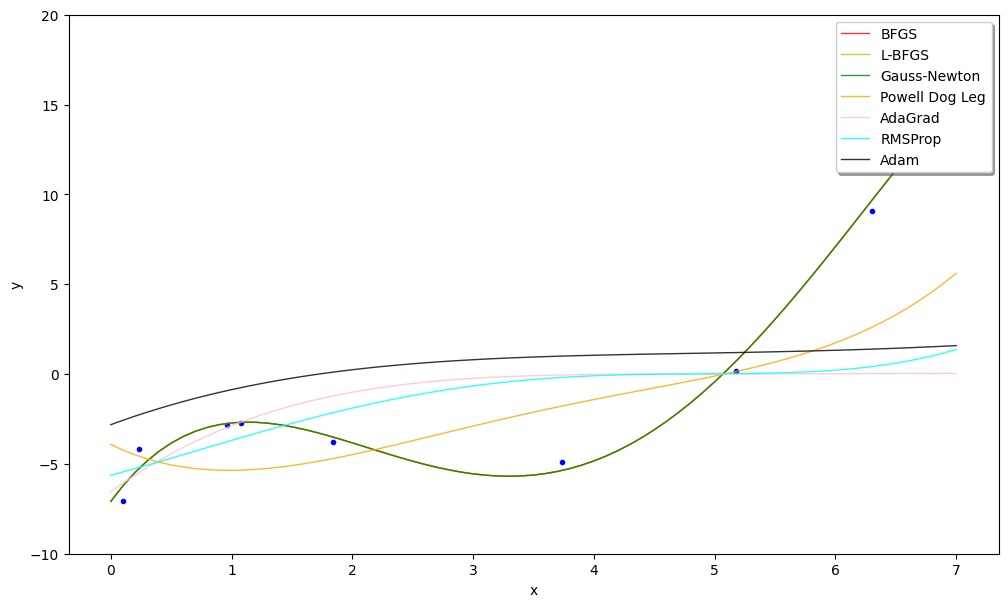

[1.0791399  5.18034788 1.84320511 3.73617575 0.10202474 6.43122906
 6.30500398 0.23394999 6.69864535 0.96046525]
[-0.42931203  6.21170405  1.63561808 -0.24536908 -0.07545588]
[-0.42930737  6.21169782  1.63561785 -0.24536757 -0.07545563]
[-0.42931202  6.21170405  1.63561808 -0.24536908 -0.07545588]
[-0.11265718  1.39443712  0.23950474  0.18305022  0.03209257]
[ 0.00197705  0.00486158  0.00316392  0.01568813 -0.00743538]
[0.01695882 0.04045942 0.03047113 0.11658742 0.01338494]
[ 1.17477397  0.11967899  0.01232868  0.01910454 -0.00210036]
BFGS & [-0.42931203  6.21170405  1.63561808 -0.24536908 -0.07545588]  \\
L-BFGS & [-0.42930737  6.21169782  1.63561785 -0.24536757 -0.07545563]  \\
Gauss-Newton & [-0.42931202  6.21170405  1.63561808 -0.24536908 -0.07545588]  \\
Powell Dog Leg & [-0.11265718  1.39443712  0.23950474  0.18305022  0.03209257]  \\
AdaGrad & [ 0.00197705  0.00486158  0.00316392  0.01568813 -0.00743538]  \\
RMSProp & [0.01695882 0.04045942 0.03047113 0.11658742 0.01338494]  \\

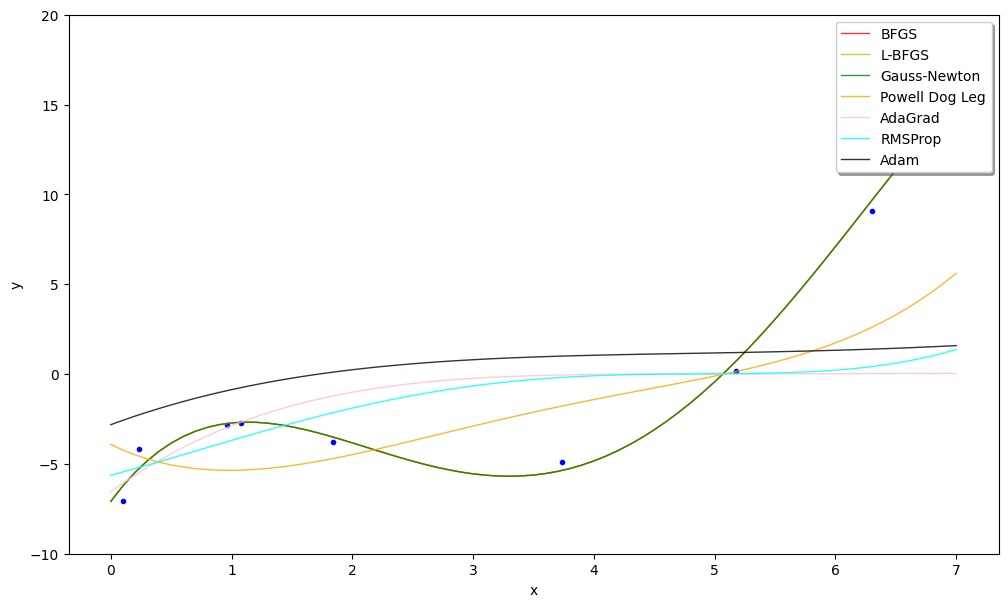

In [38]:
infos = []
ws = []
print(X)

names = ["BFGS", "L-BFGS", "Gauss-Newton", "Powell Dog Leg", "AdaGrad", "RMSProp", "Adam"]
colors = ['r', 'y', 'g', 'orange', 'pink', 'cyan', 'black', 'magenta', 'maroon']
lr = lambda epoch: 0.5 * math.exp(-0.1 * epoch)
maxit = 1000

infos.append(methods.bfgs(f, grad, start.copy(), max_iter=maxit))
ws.append(infos[-1][0][-1])
print(ws[-1])

infos.append(methods.l_bfgs(f, grad, start.copy(), max_iter=maxit))
ws.append(infos[-1][0][-1])
print(ws[-1])

infos.append(methods.gauss_newton(gauss_f, jacobian, X, y, start.copy(), max_iter=maxit))
ws.append(infos[-1][0][-1])
print(ws[-1])

infos.append(methods.trust_region_dogleg(f, grad, hess, start.copy(), max_iter=20))
ws.append(infos[-1][0][-1])
print(ws[-1])

infos.append(methods2.sgd_adagrad(f, grad, start.copy(), learning_rate=lr, max_iter=maxit))
ws.append(infos[-1][0][-1])
print(ws[-1])

infos.append(methods2.sgd_rmsprop(f, grad, start.copy(), learning_rate=lr, max_iter=maxit))
ws.append(infos[-1][0][-1])
print(ws[-1])

infos.append(methods2.sgd_adam(f, grad, start.copy(), learning_rate=lr, max_iter=maxit))
ws.append(infos[-1][0][-1])
print(ws[-1])

print_table(infos, names)
make_plot(ws, names, colors)